# Exploring a Dataset with Custom Functions
The goal of this project is to visit the concept of using custom functions to explore a dataset. To do so, a dataset recording births in the US between 1994 and 2003 will be used.

In [1]:
# Read in the data, then split it into a list of strings on the newline character
data = open("US_births_1994-2003_CDC_NCHS.csv", "r").read().split("\n")
print(data[:10])

['year,month,date_of_month,day_of_week,births', '1994,1,1,6,8096', '1994,1,2,7,7772', '1994,1,3,1,10142', '1994,1,4,2,11248', '1994,1,5,3,11053', '1994,1,6,4,11406', '1994,1,7,5,11251', '1994,1,8,6,8653', '1994,1,9,7,7910']


The data read-in phase can be streamlined in itself: let's define a custom function for it.

In [8]:
def read_csv(name):
    data = open(name, "r").read().split("\n")
    header = data[0].split(",") # We assign the column names to a header before removing them from the data
    del data[0]                 # We delete the column names so that the output list only contains numerical values
    ret = []
    for d in data:
        int_list = [int(x) for x in d.split(",")] # Let's convert all data to int type
        ret.append(int_list)
    return header, ret

In [5]:
cdc_header, cdc_list = read_csv("US_births_1994-2003_CDC_NCHS.csv")

We output both header and data to check that everything worked out correctly.

In [6]:
cdc_header

['year', 'month', 'date_of_month', 'day_of_week', 'births']

In [7]:
cdc_list[:10]

[[1994, 1, 1, 6, 8096],
 [1994, 1, 2, 7, 7772],
 [1994, 1, 3, 1, 10142],
 [1994, 1, 4, 2, 11248],
 [1994, 1, 5, 3, 11053],
 [1994, 1, 6, 4, 11406],
 [1994, 1, 7, 5, 11251],
 [1994, 1, 8, 6, 8653],
 [1994, 1, 9, 7, 7910],
 [1994, 1, 10, 1, 10498]]

Let's also print the data type to check that the conversion to int worked out correctly.

In [9]:
type(cdc_list[0][0])

int

Dictionaries are great tools for categorising data. For example, one might want to categorise the total number of births by month: using dictionaries we can set the months as dictionary keys and then assign all corresponding births to each key.

Let's define functions to produce dictionaries of data.

In [10]:
def month_births(lst):
    dicts = {}
    for l in lst:
        if l[1] in dicts:
            dicts[l[1]] += l[-1]
        else:
            dicts[l[1]] = l[-1]
    return dicts

In [11]:
cdc_month_births = month_births(cdc_list)
cdc_month_births

{1: 3232517,
 2: 3018140,
 3: 3322069,
 4: 3185314,
 5: 3350907,
 6: 3296530,
 7: 3498783,
 8: 3525858,
 9: 3439698,
 10: 3378814,
 11: 3171647,
 12: 3301860}

We can do the same for the day of the week:

In [12]:
def dow_births(lst):
    dicts = {}
    for l in lst:
        if l[3] in dicts:
            dicts[l[3]] += l[-1]
        else:
            dicts[l[3]] = l[-1]
    return dicts

In [13]:
cdc_day_births = dow_births(cdc_list)
cdc_day_births

{6: 4562111,
 7: 4079723,
 1: 5789166,
 2: 6446196,
 3: 6322855,
 4: 6288429,
 5: 6233657}

As one might notice, the month_births() and dow_births() functions are close to identical - they only differ by the column index! There's an opportunity here to develop a generalist function that takes in a column index and returns the corresponding dictionary of births.

In [14]:
def calc_counts(lst,col):
    dicts = {}
    for l in lst:
        if l[col] in dicts:
            dicts[l[col]] += l[-1]
        else:
            dicts[l[col]] = l[-1]
    return dicts

Let's use the function to get dictionaries for all parameters.

In [15]:
cdc_year_births = calc_counts(cdc_list,0)
cdc_month_births = calc_counts(cdc_list,1)
cdc_dom_births = calc_counts(cdc_list,2)
cdc_dow_births = calc_counts(cdc_list,3)

In [16]:
cdc_year_births

{1994: 3952767,
 1995: 3899589,
 1996: 3891494,
 1997: 3880894,
 1998: 3941553,
 1999: 3959417,
 2000: 4058814,
 2001: 4025933,
 2002: 4021726,
 2003: 4089950}

In [17]:
cdc_month_births

{1: 3232517,
 2: 3018140,
 3: 3322069,
 4: 3185314,
 5: 3350907,
 6: 3296530,
 7: 3498783,
 8: 3525858,
 9: 3439698,
 10: 3378814,
 11: 3171647,
 12: 3301860}

In [18]:
cdc_dom_births

{1: 1276557,
 2: 1288739,
 3: 1304499,
 4: 1288154,
 5: 1299953,
 6: 1304474,
 7: 1310459,
 8: 1312297,
 9: 1303292,
 10: 1320764,
 11: 1314361,
 12: 1318437,
 13: 1277684,
 14: 1320153,
 15: 1319171,
 16: 1315192,
 17: 1324953,
 18: 1326855,
 19: 1318727,
 20: 1324821,
 21: 1322897,
 22: 1317381,
 23: 1293290,
 24: 1288083,
 25: 1272116,
 26: 1284796,
 27: 1294395,
 28: 1307685,
 29: 1223161,
 30: 1202095,
 31: 746696}

In [19]:
cdc_dow_births

{6: 4562111,
 7: 4079723,
 1: 5789166,
 2: 6446196,
 3: 6322855,
 4: 6288429,
 5: 6233657}

Nice! The pyplot library can now be used to visualise the results.

In [23]:
import matplotlib.pyplot as plt
from numpy import arange, linspace
%matplotlib inline

In [29]:
list(cdc_month_births.values())

[3232517,
 3018140,
 3322069,
 3185314,
 3350907,
 3296530,
 3498783,
 3525858,
 3439698,
 3378814,
 3171647,
 3301860]

Text(0.5,1,'Births by year')

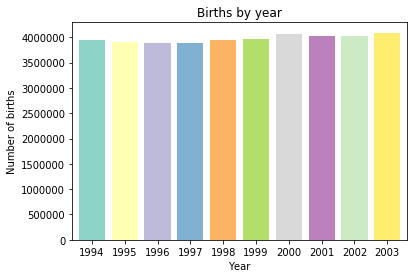

In [36]:
colors = [plt.cm.Set3(i) for i in linspace(0,1,len(cdc_year_births))]
fig, ax = plt.subplots()
ax.bar(arange(len(cdc_year_births))+.4,height=list(cdc_year_births.values()),width=.8,color=colors)
ax.set_xticks(arange(len(cdc_year_births))+.4)
ax.set_xticklabels(cdc_year_births.keys())
ax.set_xlim([-.2,len(cdc_year_births)])
ax.set_xlabel("Year")
ax.set_ylabel("Number of births")
ax.set_title("Births by year")

Text(0.5,1,'Births by month')

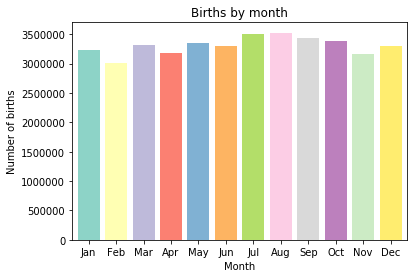

In [41]:
colors = [plt.cm.Set3(i) for i in linspace(0,1,len(cdc_month_births))]
fig, ax = plt.subplots()
ax.bar(arange(len(cdc_month_births))+.4,height=list(cdc_month_births.values()),width=.8,color=colors)
ax.set_xticks(arange(len(cdc_month_births))+.4)
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
ax.set_xlim([-.2,len(cdc_month_births)])
ax.set_xlabel("Month")
ax.set_ylabel("Number of births")
ax.set_title("Births by month")

Text(0.5,1,'Births by day of month')

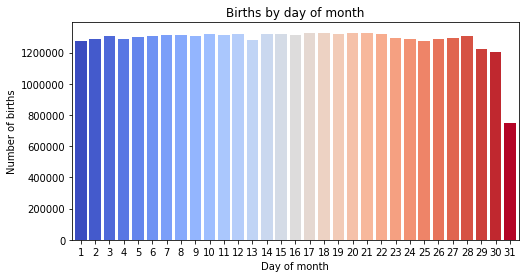

In [48]:
colors = [plt.cm.coolwarm(i) for i in linspace(0,1,len(cdc_dom_births))]
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(arange(len(cdc_dom_births))+.4,height=list(cdc_dom_births.values()),width=.8,color=colors)
ax.set_xticks(arange(len(cdc_dom_births))+.4)
ax.set_xticklabels(cdc_dom_births.keys())
ax.set_xlim([-.2,len(cdc_dom_births)])
ax.set_xlabel("Day of month")
ax.set_ylabel("Number of births")
ax.set_title("Births by day of month")

Text(0.5,1,'Births by day of week')

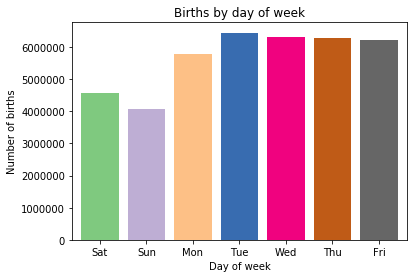

In [43]:
colors = [plt.cm.Accent(i) for i in linspace(0,1,len(cdc_dow_births))]
fig, ax = plt.subplots()
ax.bar(arange(len(cdc_dow_births))+.4,height=list(cdc_dow_births.values()),width=.8,color=colors)
ax.set_xticks(arange(len(cdc_dow_births))+.4)
ax.set_xticklabels(["Sat","Sun","Mon","Tue","Wed","Thu","Fri"])
ax.set_xlim([-.2,len(cdc_dow_births)])
ax.set_xlabel("Day of week")
ax.set_ylabel("Number of births")
ax.set_title("Births by day of week")

Custom functions can of course be made as convoluted as one wants: let's define a slightly modified function that can create a dictionary of births divided by year and specific to a single value of a parameter of our choice. This can let us track how births increased or decreased over the 1994-2003 period covered by the dataset.

In [44]:
def par_by_year(lst,col,par):
    dicts = {}
    for l in lst:
        if l[col] == par:
            if l[0] in dicts:
                dicts[l[0]] += l[-1]
            else:
                dicts[l[0]] = l[-1]
    return dicts

For example, how did births on Saturday change over the time period?

In [45]:
cdc_sat_births_byYear = par_by_year(cdc_list,3,6)

Text(0.5,1,'Saturday births, by year')

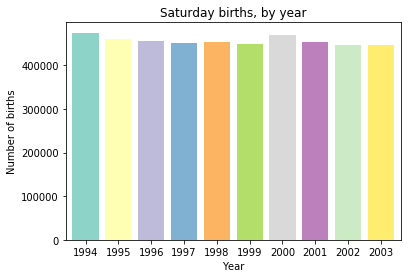

In [46]:
colors = [plt.cm.Set3(i) for i in linspace(0,1,len(cdc_sat_births_byYear))]
fig, ax = plt.subplots()
f1 = ax.bar(arange(len(cdc_sat_births_byYear))+.4,height=list(cdc_sat_births_byYear.values()),width=.8,color=colors)
ax.set_xticks(arange(len(cdc_sat_births_byYear))+.4)
ax.set_xticklabels(cdc_sat_births_byYear.keys())
ax.set_xlim([-.2,len(cdc_sat_births_byYear)])
ax.set_xlabel("Year")
ax.set_ylabel("Number of births")
ax.set_title("Saturday births, by year")